In [1]:
import pandas as pd 

In [ ]:
all_data

In [2]:
cols = ['rate', 'review_text', 'object_address']
all_data = pd.read_csv('/Users/camille/repo/Hetic/projet_gouv/scraping/data_nlp/google_reviews_RGPD.csv', usecols=cols)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16645 entries, 0 to 16644
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rate            16645 non-null  int64 
 1   review_text     9538 non-null   object
 2   object_address  16645 non-null  object
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [3]:
all_data.dropna(subset=['review_text'], inplace=True)

In [4]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')

In [ ]:
all_data

In [5]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
!python -m spacy download fr_core_news_sm

all_data['review_text'] = all_data['review_text'].astype(str)
fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    
    # Enlever les ponctuations
    text = text.str.replace(r'[^\w\s]|_', '')
    
    # Lemmatisation et suppression des stopwords
    text = text.apply(lambda x: ' '.join([token.lemma_ for token in fr(x) if token.pos_ != 'VERB' and token.lemma_ not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    # Enlever les espaces en trop
    text = text.str.replace(r'\s+', ' ')
    
    # Enlever les espaces en début et fin de texte
    text = text.str.strip()

    return text

all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))


     |████████████████████████████████| 16.3 MB 10.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/camille/repo/Hetic/projet_gouv/scraping/gouv_env/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [6]:
# Créer un dataframe avec les données nettoyées
all_data['cleaned_text'] = clean_text(all_data['review_text'].astype(str))

KeyboardInterrupt: 

In [7]:
all_data['review_text'] = all_data['review_text'].str.replace('\n', ' ')
all_data

,rate,review_text,object_address,cleaned_text
0,1,Pas de formation possible Pas de financement p...,"5 Rue de Quimper, 68100 Mulhouse",formation financement refus refus parcours inu...
1,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci faire rond p...
2,1,"Les fonctionnaires incompétents, arrogants et ...","5 Rue de Quimper, 68100 Mulhouse",fonctionnaire incompétent arrogant prétentieux...
3,1,"Aucun respect, j’explique pourtant bien mon so...","5 Rue de Quimper, 68100 Mulhouse",aucun respect pourtant bien souci air hautain ...
4,1,Si je pouvais ne pas mettre d'étoiles je n'en ...,"5 Rue de Quimper, 68100 Mulhouse",étoile mettrai conseiller indemnisation désagr...
...,...,...,...,...
16623,3,j'ai eu soixante ans le 15 mars ; suis je obli...,"45 Av. Billaud Varenne, 17000 La Rochelle",soixant mars pointé
16624,3,Un pôle emploi comme un autre,"45 Av. Billaud Varenne, 17000 La Rochelle",pôle
16625,1,Incompétents.,"45 Av. Billaud Varenne, 17000 La Rochelle",incompétent
16626,1,Sourires en option,"45 Av. Billaud Varenne, 17000 La Rochelle",sourire option


In [8]:
# Créer le DataFrame groupé avec la moyenne des rates
grouped = all_data.pivot_table(index='object_address', values=['cleaned_text', 'rate'], aggfunc={'cleaned_text': ' '.join, 'rate': 'mean'}).reset_index()

# Arrondir la note moyenne à une décimale
grouped['rate'] = grouped['rate'].apply(lambda x: round(x, 1))

# Afficher le DataFrame groupé


In [9]:
grouped['cleaned_text'] = grouped['cleaned_text'].str.replace('...', ' ')

In [10]:
grouped

,object_address,cleaned_text,rate
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2
...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel genre lieu souligner propre ...,3.6
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8


In [31]:
from collections import Counter

# Fonction pour compter les mots dans un texte
def count_words(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts

# Compter les mots dans chaque texte regroupé
grouped['word_counts'] = grouped['cleaned_text'].apply(count_words)

# Afficher le DataFrame avec la nouvelle colonne
grouped


,object_address,cleaned_text,rate,word_counts
0,"0 Rue Olympe de Gouges, 45300 Pithiviers",tentative rendez-vous téléphonique heure rende...,2.6,"{'tentative': 1, 'rendez-vous': 3, 'téléphoniq..."
1,"1 A Rue du Clos Jeune, 25500 Morteau",agence intérêt radiation suite non présentatio...,1.6,"{'agence': 3, 'intérêt': 2, 'radiation': 2, 's..."
2,"1 All. des Citronniers, 44000 Nantes",chômage avril 2022 impossibilité actuellement ...,2.5,"{'chômage': 2, 'avril': 1, '2022': 1, 'impossi..."
3,"1 All. des Fabricants, 59150 Wattrelos",distance accompagnement simplement rdv rapidem...,2.4,"{'distance': 1, 'accompagnement': 1, 'simpleme..."
4,"1 Av. Maréchal-Juin, 38800 Le Pont-de-Claix",présent rendez-vous travail bien servir pire p...,2.2,"{'présent': 1, 'rendez-vous': 1, 'travail': 2,..."
...,...,...,...,...
603,"Victoire Daubie, 199 Rue Julie Daubié, 54000 N...",autant chomé inverse the unemployment office w...,3.8,"{'autant': 1, 'chomé': 1, 'inverse': 1, 'the':..."
604,"Voie Tertullien Monta, Rivière-Salée 97215, Ma...",appel conseiller vraiment projet professionnel...,1.5,"{'appel': 1, 'conseiller': 1, 'vraiment': 1, '..."
605,"ZA les Rodettes, 34120 Pézenas",endroit personnel sympathique genre lieu souli...,3.6,"{'endroit': 1, 'personnel': 1, 'sympathique': ..."
606,"Zac De, Tessan, 30120 Le Vigan",convoqu sen convocation temps travail temps j...,2.8,"{'convoqu': 1, 'sen': 1, 'convocation': 2, 'te..."


In [32]:
from collections import Counter

# Fonction pour générer un rapport intelligent sur les comptages de mots
def generate_word_counts_report(word_counts, average_rate):
    # Total de mots
    total_words = sum(word_counts.values())

    # Les 10 mots les plus fréquents
    top_10_words = word_counts.most_common(10)

    # Moyenne de fréquence des mots
    average_frequency = total_words / len(word_counts)

    # Génération du rapport
    report = f"Total de mots : {total_words}\n"
    report += f"Moyenne de fréquence des mots : {average_frequency}\n"
    report += f"Moyenne des notes : {average_rate}\n"  # Nouvelle ligne pour afficher la note moyenne
    report += "\nLes 10 mots les plus fréquents :\n"
    for word, count in top_10_words:
        report += f"{word} : {count}\n"

    return report

# Générer le rapport pour chaque lieu
for index, row in grouped.iterrows():
    location = row['object_address']
    word_counts = row['word_counts']
    average_rate = row['rate']  # Récupérer la note moyenne du DataFrame
    report = generate_word_counts_report(word_counts, average_rate)
    print(f"Rapport pour le lieu : {location}\n")
    print(report)
    print("==============================\n")


Rapport pour le lieu : 0 Rue Olympe de Gouges, 45300 Pithiviers

Total de mots : 166
Moyenne de fréquence des mots : 1.3387096774193548
Moyenne des notes : 2.6

Les 10 mots les plus fréquents :
heure : 4
bien : 4
rendez-vous : 3
pôle : 3
conseiller : 3
accueil : 3
agréable : 3
dossier : 3
aucun : 3
mois : 3


Rapport pour le lieu : 1 A Rue du Clos Jeune, 25500 Morteau

Total de mots : 125
Moyenne de fréquence des mots : 1.3440860215053763
Moyenne des notes : 1.6

Les 10 mots les plus fréquents :
conseiller : 6
emploi : 5
jamais : 4
mois : 4
agence : 3
. : 3
impossible : 3
morteau : 3
intérêt : 2
radiation : 2


Rapport pour le lieu : 1 All. des Citronniers, 44000 Nantes

Total de mots : 293
Moyenne de fréquence des mots : 1.3820754716981132
Moyenne des notes : 2.5

Les 10 mots les plus fréquents :
accueil : 7
rendez-vous : 6
bien : 6
professionnel : 5
rien : 5
personnel : 5
dossier : 4
emploi : 4
aucun : 4
fois : 4


Rapport pour le lieu : 1 All. des Fabricants, 59150 Wattrelos

Total 

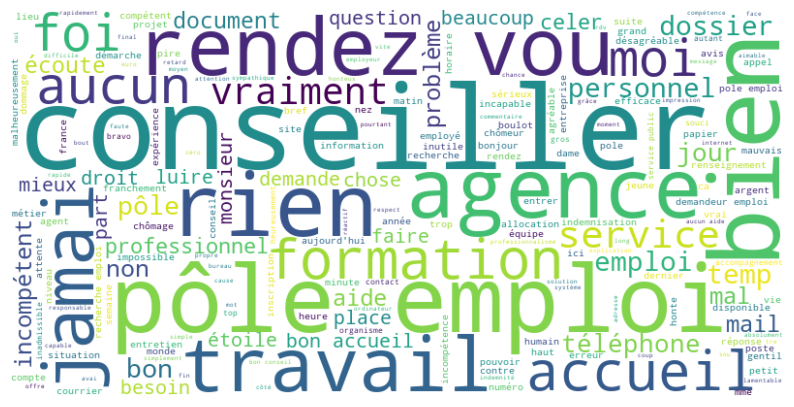

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concaténer tous les textes dans une seule chaîne de caractères
text = ' '.join(all_data['cleaned_text'].values)

# Créer l'objet WordCloud avec les paramètres souhaités
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:
pos = all_data[all_data['rate'] >= 2.5]
neg = all_data[all_data['rate'] < 2.5]

In [23]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [62]:
counter

Counter({'bon': 872,
         'accueil': 853,
         'bien': 833,
         'conseiller': 789,
         'emploi': 635,
         'personnel': 572,
         'pôle': 512,
         'écoute': 489,
         'agence': 369,
         'agréable': 304,
         '...': 302,
         'service': 278,
         'professionnel': 220,
         'beaucoup': 214,
         'équipe': 200,
         'conseil': 184,
         'rendez-vous': 183,
         'travail': 178,
         'temps': 170,
         'compétent': 166,
         'dossier': 161,
         'grand': 160,
         'aide': 158,
         'rien': 157,
         'fois': 157,
         'efficace': 156,
         'problème': 150,
         'vraiment': 149,
         'sympathique': 144,
         'top': 134,
         'rapide': 133,
         'question': 130,
         'attente': 127,
         'disponible': 126,
         'formation': 111,
         'mme': 109,
         'réponse': 107,
         'matin': 105,
         'avis': 104,
         'recherche': 104,
         'p

In [29]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)


All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [32]:
corpus = [
    "Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.",
    "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
    "Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.", 
    "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable.",
    # Ajoutez d'autres reviews ici
]

In [35]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [38]:
print(nlp("Alad'2 est clairement le meilleur film de l'année 2018.")) # POSITIVE
print(nlp("Juste whoaaahouuu !")) # POSITIVE
print(nlp("Il  n'est pas incompétant ")) # NEGATIVE
print(nlp("Je m'attendais à mieux de la part de Franck Dubosc !")) # NEGATIVE

[{'label': 'POSITIVE', 'score': 0.9657253623008728}]
[{'label': 'POSITIVE', 'score': 0.9862489104270935}]
[{'label': 'POSITIVE', 'score': 0.5976418852806091}]
[{'label': 'NEGATIVE', 'score': 0.9956077933311462}]


In [43]:
corpus

['Ce lieu est horrible, le service est médiocre et la nourriture est immangeable.',
 "Je n'ai pas du tout aimé cet endroit, les prix sont exorbitants pour ce qu'ils offrent.",
 'Le personnel était impoli et incompétent, je ne recommande vraiment pas cet établissement.',
 "J'ai adoré cet endroit, la nourriture était délicieuse et le service était impeccable."]

In [42]:
from nltk.corpus import stopwords

def preprocess_text(text):
    # Suppression des caractères spéciaux, de la ponctuation et des chiffres
    text = re.sub(r"[^a-zA-ZÀ-ú]", " ", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Reconstitution du texte prétraité
    processed_text = " ".join(text.split())
    
    return processed_text

preprocessed_corpus = [preprocess_text(review) for review in corpus]

# Chargement du tokenizer et du modèle de classification de sentiment
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

# Construction du corpus négatif
negative_reviews = []
for review in preprocessed_corpus:
    inputs = tokenizer.encode_plus(review, add_special_tokens=True, return_tensors="tf", padding=True, truncation=True)
    input_ids = inputs["input_ids"].numpy()[0]
    outputs = model(inputs)
    predicted_label = outputs.logits.numpy().argmax()
    if predicted_label == 0:
        negative_reviews.append(review)

# Création de la matrice c-TF-IDF
stopwords = set(stopwords.words("french"))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))
ctfidf_matrix = vectorizer.fit_transform(negative_reviews)




# Récupération des mots les plus récurrents pour les commentaires négatifs
feature_names = vectorizer.get_feature_names_out()
top_negative_words = []

for i in range(ctfidf_matrix.shape[0]):
    review_ctfidf_scores = ctfidf_matrix[i].toarray()[0]
    top_indices = review_ctfidf_scores.argsort()[-5:][::-1]  # Sélectionne les 5 scores les plus importants
    review_negative_words = [feature_names[idx] for idx in top_indices if feature_names[idx] not in stopwords]
    top_negative_words.extend(review_negative_words)

top_negative_words = list(set(top_negative_words))  # Supprime les doublons

print("Mots les plus récurrents pour les commentaires négatifs :")
print(top_negative_words)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Mots les plus récurrents pour les commentaires négatifs :
['personnel', 'tout', 'service', 'endroit', 'établissement', 'incompétent', 'recommande', 'immangeable', 'aimé', 'vraiment', 'nourriture', 'horrible', 'médiocre', 'exorbitants', 'prix']


In [ ]:
streemed_text

In [ ]:
streemed_text_remove = clean_text(streemed_text)


In [ ]:
from collections import Counter
split_it = streemed_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
cleaned_text = cleaned_text(example)

In [ ]:
example = stem_text(clean_text)


In [ ]:
example

In [ ]:

fr = spacy.load("fr_core_news_sm")

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

# Appeler la fonction lemmatize_text() sur le texte
lemmatized_text = lemmatize_text(clean_text)

In [ ]:
lemmatized_text

In [ ]:
lemmatized_text
from collections import Counter
split_it = lemmatized_text.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
lemmatized_text

In [ ]:
from PIL import Image
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

Prendre un n gram 

In [ ]:
lemmatized_text_modified = ' '.join([word for word in lemmatized_text.split() if len(word) > 3])


In [ ]:
lemmatized_text_modified

In [ ]:
from collections import Counter
split_it = lemmatized_text_modified.split()
word_counts_lem = Counter(split_it)
word_counts_lem

In [ ]:
# Convert the list of words to a string
wordcloud_text = ' '.join(word_counts_lem)

# Create and generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_counts_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')


# Display the generated image:

plt.show()

In [ ]:
import pandas as pd

# Exemple de DataFrame avec une colonne 'text'
data = pd.DataFrame({'text': ['service client, aidez-moi s\'il vous plaît', 'j\'ai besoin d\'aide', 'merci pour votre soutien']})

# Appliquer la transformation sur chaque valeur de la colonne 'text'
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))

data


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)


In [ ]:
cleaned_text = cleaned_text(exemple)

In [ ]:
cleaned_text

In [ ]:
from collections import Counter

# Utiliser la méthode apply() pour appliquer split() à chaque élément de la série
split_it = cleaned_text.apply(lambda x: x.split())

# Compter les occurrences des mots
word_counts = Counter([word for sublist in split_it for word in sublist])
word_counts


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.str.lower()
    
    # Enlever les apostrophes
    text = text.str.replace(r'\'', ' ')
    # Enlever les points
    text = text.str.replace(r'\.', ' ')
    # Enlever les virgules
    text = text.str.replace(r',', ' ')

    # Enlever les ponctuations et les caractères spéciaux
    text = text.str.replace(r'[^\w\s]', ' ')
    
    # Enlever les stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    # Enlever les chiffres et les nombres
    text = text.str.replace(r'\d+', '')
    
    # Enlever les mots de 2 lettres
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return text

# Appeler la fonction clean_text() sur la variable text
cleaned_text = clean_text(text)
cleaned_text_str = " ".join(cleaned_text)

import spacy
nlp = spacy.load("fr_core_news_sm")
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def lemmatize_text(text):
    doc = fr(text)
    lemmatized_sentences = []
    for sent in doc.sents:
        lemmatized_tokens = [token.lemma_ for token in sent]
        lemmatized_sentence = " ".join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)
    return " ".join(lemmatized_sentences)

def  stem_text(text):
    doc = fr(text)
    stem_sentences = []
    for sent in doc.sents:
        stem_tokens = [stemmer.stem(token.text) for token in sent]
        stem_sentence = " ".join(stem_tokens)
        stem_sentences.append(stem_sentence)
    return " ".join(stem_sentences)

stemmed_text = stem_text(cleaned_text_str)
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
import re
import spacy
import pandas as pd

# Assurez-vous d'exécuter cette ligne pour télécharger le modèle spaCy français
# !python -m spacy download fr_core_news_sm

text = all_data['review_text'].astype(str)

fr = spacy.load("fr_core_news_sm")
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    
    # Enlever les apostrophes
    text = re.sub(r'\'', ' ', text)
    # Enlever les points
    text = re.sub(r'\.', ' ', text)
    # Enlever les virgules
    text = re.sub(r',', ' ', text)

    # Enlever les ponctuations et les caractères spéciaux
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Enlever les stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Enlever les chiffres et les nombres
    text = re.sub(r'\d+', '', text)
    
    # Enlever les mots de 2 lettres
    text = ' '.join([word for word in text.split() if len(word) > 2])

    return text

# Appeler la fonction clean_text() sur la variable stemmed_text
clean_stemmed_text = clean_text(stemmed_text)


In [ ]:
clean_stemmed_text

In [ ]:
#counter
from collections import Counter
clean_stemmed_text_counter = Counter(clean_stemmed_text.split())
clean_stemmed_text_counter

In [ ]:
all_data